<a href="https://colab.research.google.com/github/victordsrocha/Aprendizagem-de-Maquina-2021.1/blob/main/ML_Trabalho_Final_Rede_Neural_3_bolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ainda precisa ser organizado e comentado!

import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Get the data

In [ ]:
dataset_path = 'https://github.com/victordsrocha/Aprendizagem-de-Maquina-2021.1/raw/main/dataset-3bolas-50k.csv'

# mantive todas as colunas para caso sejam úteis no futuro
column_names = ['bola_branca_x','bola_branca_y',
                'bola_1_x','bola_1_y',
                'bola_2_x','bola_2_y',
                'bola_3_x','bola_3_y',
                'tacada_x','tacada_y','forca',
                'out_bola_branca_x','out_bola_branca_y',
                'out_bola_1_x','out_bola_1_y',
                'out_bola_2_x','out_bola_2_y',
                'out_bola_3_x','out_bola_3_y',
                'dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y']

raw_dataset = pd.read_csv(dataset_path, names=column_names, sep=',')
full_dataset = raw_dataset.copy()

# drop das colunas que não vamos utilizar
raw_dataset=raw_dataset.drop(
    columns=['forca',
             'out_bola_branca_x','out_bola_branca_y',
             'out_bola_1_x','out_bola_1_y',
             'out_bola_2_x','out_bola_2_y',
             'out_bola_3_x','out_bola_3_y',
             'dist_custo1','dist_custo2','dist_custo3','dist_custo4',
             'colisao_x','colisao_y'])

dataset = raw_dataset.copy()
dataset.tail()

,bola_branca_x,bola_branca_y,bola_1_x,bola_1_y,bola_2_x,bola_2_y,bola_3_x,bola_3_y,tacada_x,tacada_y
53716,0.305599,0.238003,0.786556,0.576441,0.046314,0.600777,0.977948,0.142792,0.818454,0.574573
53717,0.491328,0.387249,0.273814,0.157505,0.644037,0.014752,0.204211,0.524148,-0.675769,-0.737113
53718,0.332819,0.194236,0.766932,0.468974,0.428644,0.707051,0.386743,0.107589,0.514057,-0.857756
53719,0.765386,0.424373,0.276345,0.602154,0.612153,0.071065,0.331014,0.110223,-0.370271,-0.928924
53720,0.068889,0.169737,0.074424,0.117792,0.598797,0.305177,0.529469,0.533210,0.780187,0.625546


In [ ]:
#Sequência de verdadeiros e falsos para cada buraco
data = full_dataset.to_numpy()
enca = np.array([((data[:,13]==.01) * (data[:,14]==.01)),
                 ((data[:,13]==.01) * (data[:,14]==.74)),
                 ((data[:,13]==.99) * (data[:,14]==.01)),
                 ((data[:,13]==.99) * (data[:,14]==.74))])

Split the data into train and test

In [ ]:
X = dataset.drop(columns=['tacada_x','tacada_y'])
X = X[enca[3]]
y = pd.DataFrame({"arc_tangent":np.arctan(dataset['tacada_x'] / dataset['tacada_y']).T})
y = y[enca[3]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inspect the data

In [ ]:
# apresenta a descrição dos dados de treino - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,4364.0,0.488978,0.249078,0.010246,0.285486,0.500000,0.697228,0.989807
bola_branca_y,4364.0,0.305567,0.180987,0.010042,0.159435,0.291506,0.428236,0.739503
bola_1_x,4364.0,0.777249,0.178380,0.010000,0.721131,0.800000,0.907285,0.990453
bola_1_y,4364.0,0.515286,0.165607,0.010000,0.375000,0.548164,0.661697,0.740000
bola_2_x,4364.0,0.604097,0.288418,0.010000,0.364816,0.695898,0.840000,0.990115
bola_2_y,4364.0,0.376019,0.196140,0.010000,0.223682,0.375000,0.530650,0.740000
bola_3_x,4364.0,0.594177,0.296041,0.010000,0.342851,0.657605,0.880000,0.990288
bola_3_y,4364.0,0.379324,0.189166,0.010000,0.244139,0.375000,0.518482,0.740000


In [ ]:
# apresenta a descrição dos dados de treino - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arc_tangent,4364.0,0.592894,0.757995,-1.569934,0.298695,0.797407,1.121742,1.569245


Normalize the data

In [ ]:
# não testei se a normalização realmente ajuda

# normalização z-score de todos os dados

import numpy as np

def normalize_zscore(data):
    data_scaled = data
    data_mean = data_scaled.mean(axis=0)
    data_std = data_scaled.std(axis=0)
    data_scaled = (data_scaled - data_mean) / data_std
    return data_scaled

# X_train = normalize_zscore(X_train)
# X_test = normalize_zscore(X_test)
# y_train = normalize_zscore(y_train)
# y_test = normalize_zscore(y_test)

In [ ]:
# apresenta a descrição dos dados de treino normalizados - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,4364.0,0.488978,0.249078,0.010246,0.285486,0.500000,0.697228,0.989807
bola_branca_y,4364.0,0.305567,0.180987,0.010042,0.159435,0.291506,0.428236,0.739503
bola_1_x,4364.0,0.777249,0.178380,0.010000,0.721131,0.800000,0.907285,0.990453
bola_1_y,4364.0,0.515286,0.165607,0.010000,0.375000,0.548164,0.661697,0.740000
bola_2_x,4364.0,0.604097,0.288418,0.010000,0.364816,0.695898,0.840000,0.990115
bola_2_y,4364.0,0.376019,0.196140,0.010000,0.223682,0.375000,0.530650,0.740000
bola_3_x,4364.0,0.594177,0.296041,0.010000,0.342851,0.657605,0.880000,0.990288
bola_3_y,4364.0,0.379324,0.189166,0.010000,0.244139,0.375000,0.518482,0.740000


In [ ]:
# apresenta a descrição dos dados de treino normalizados - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arc_tangent,4364.0,0.592894,0.757995,-1.569934,0.298695,0.797407,1.121742,1.569245


Build the model

In [ ]:
# dimensões de entrada e saída
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

# modelo
model = keras.models.Sequential()
model.add(layers.Dense(64, input_dim=in_dim, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(out_dim))

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss="mse", optimizer=optimizer, metrics=['mae','mse'])

# log tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logggs")

# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# sumário do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=64, verbose=1, callbacks=[early_stop, tensorboard_callback])

Epoch 1/1000
69/69 [==============================] - 1s 5ms/step - loss: 0.5470 - mae: 0.5362 - mse: 0.5470 - val_loss: 0.5349 - val_mae: 0.5009 - val_mse: 0.5349
Epoch 2/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.4785 - mae: 0.4713 - mse: 0.4785 - val_loss: 0.5265 - val_mae: 0.4606 - val_mse: 0.5265
Epoch 3/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.4354 - mae: 0.4354 - mse: 0.4354 - val_loss: 0.4340 - val_mae: 0.4086 - val_mse: 0.4340
Epoch 4/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.3864 - mae: 0.3959 - mse: 0.3864 - val_loss: 0.4150 - val_mae: 0.4563 - val_mse: 0.4150
Epoch 5/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.3395 - mae: 0.3606 - mse: 0.3395 - val_loss: 0.3430 - val_mae: 0.3572 - val_mse: 0.3430
Epoch 6/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.3140 - mae: 0.3365 - mse: 0.3140 - val_loss: 0.3692 - val_mae: 0.3328 - val_mse: 0.3692
Epoch 7/1000
69/

In [ ]:
# Comandos para fazer download da pasta de logs para o tensorboard

"""
!zip -r /content/file.zip /content/logggs
from google.colab import files
files.download("/content/file.zip")
"""

'\n!zip -r /content/file.zip /content/logggs\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

Plot

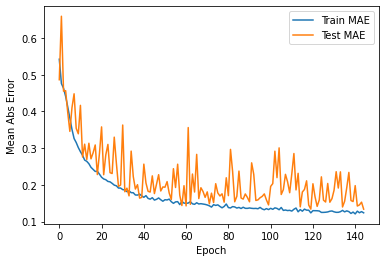

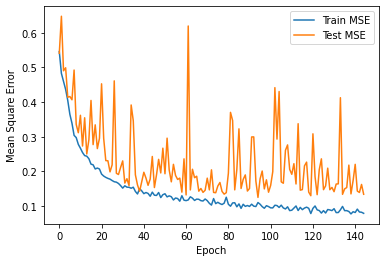

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'], label='Train MAE')
  plt.plot(hist['epoch'], hist['val_mae'], label='Test MAE')
  plt.legend()
  #plt.ylim([0,5])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'], label='Test MSE')
  plt.legend()
  #plt.ylim([0,20])

plot_history(history)

